In [1]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
import pandas as pd
import random
style.use('fivethirtyeight')
%matplotlib notebook

<IPython.core.display.Javascript object>


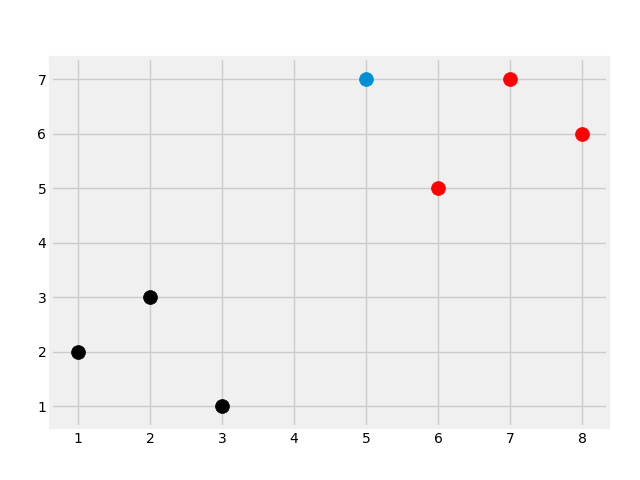

In [2]:
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0],new_features[1],s=100)
plt.show()

In [86]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn("K is set to a value less than total voting groups!")
    distances = []
    for group in data:
        for features in data[group]:
#           euclidean_distance = sqrt((plot1[0] - plot12[0])**2 + (plot1[1] - plot2[1])**2)
#           euclidean_distance = sqrt( (features[0]-predict[0])**2 + (features[1]-predict[1])**2)
#           eucledian_distance = np.sqrt(np.sum((np.array(features)-np.array(predict))**2))
            euclidean_distance = np.linalg.norm( np.array(features) - np.array(predict))
            distances.append([euclidean_distance,group])
    votes = [i[1] for i in sorted(distances)[:k]]
    #print(Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    #print("Vote Result",vote_result)
    #print(vote_result, confidence)
    return vote_result, confidence

In [87]:
##Testing Sample Dataset 

result, confidence = k_nearest_neighbors(dataset, new_features, k=3)
print(result)

[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0],new_features[1],s=100,color=result)
plt.show()

r


In [88]:
## Testing Reallife Breast Cancer Dataset
accuracies = []
for i in range(25):
    df = pd.read_csv('breastdata.txt')
    df.replace('?', -99999, inplace=True)
    df.drop(['id'], 1, inplace=True)
    full_data = df.astype(float).values.tolist()
    random.shuffle(full_data)
    test_size = 0.4
    train_set = {2:[], 4:[]}
    test_set = {2:[], 4:[]}
    train_data = full_data[:-int(test_size*len(full_data))]
    test_data = full_data[-int(test_size*len(full_data)):]

    for i in train_data:
        train_set[i[-1]].append(i[:-1])

    for i in test_data:
        test_set[i[-1]].append(i[:-1])

    correct = 0
    total = 0

    for group in test_set:
        for data in test_set[group]:
            vote, confidence = k_nearest_neighbors(train_set, data, k=5)
            if group == vote:
                correct += 1
            total += 1
    print("Accuracy:",correct/total)
    accuracies.append(correct/total)

Accuracy: 0.956989247311828
Accuracy: 0.978494623655914
Accuracy: 0.974910394265233
Accuracy: 0.967741935483871
Accuracy: 0.982078853046595
Accuracy: 0.9605734767025089
Accuracy: 0.9498207885304659
Accuracy: 0.9605734767025089
Accuracy: 0.956989247311828
Accuracy: 0.9713261648745519
Accuracy: 0.956989247311828
Accuracy: 0.9713261648745519
Accuracy: 0.96415770609319
Accuracy: 0.978494623655914
Accuracy: 0.956989247311828
Accuracy: 0.96415770609319
Accuracy: 0.9498207885304659
Accuracy: 0.9713261648745519
Accuracy: 0.9713261648745519
Accuracy: 0.9713261648745519
Accuracy: 0.978494623655914
Accuracy: 0.9713261648745519
Accuracy: 0.974910394265233
Accuracy: 0.946236559139785
Accuracy: 0.96415770609319


In [83]:
print(sum(accuracies)/len(accuracies))

0.9673118279569892
